In [25]:
from sklearn.datasets import fetch_california_housing
from simple_linear_regression import SimpleLinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#### Data Inspection

In [2]:
house_data = fetch_california_housing()

In [3]:
print(house_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
print(house_data.target_names)

['MedHouseVal']


In [5]:
# Prepare data dictionary
dict_data = {}
j = 0
for i in house_data.feature_names:
    dict_data[i] = house_data.data[:,j]
    j += 1
dict_data[house_data.target_names[0]] = house_data.target
print(dict_data)

{'MedInc': array([8.3252, 8.3014, 7.2574, ..., 1.7   , 1.8672, 2.3886]), 'HouseAge': array([41., 21., 52., ..., 17., 18., 16.]), 'AveRooms': array([6.98412698, 6.23813708, 8.28813559, ..., 5.20554273, 5.32951289,
       5.25471698]), 'AveBedrms': array([1.02380952, 0.97188049, 1.07344633, ..., 1.12009238, 1.17191977,
       1.16226415]), 'Population': array([ 322., 2401.,  496., ..., 1007.,  741., 1387.]), 'AveOccup': array([2.55555556, 2.10984183, 2.80225989, ..., 2.3256351 , 2.12320917,
       2.61698113]), 'Latitude': array([37.88, 37.86, 37.85, ..., 39.43, 39.43, 39.37]), 'Longitude': array([-122.23, -122.22, -122.24, ..., -121.22, -121.32, -121.24]), 'MedHouseVal': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])}


In [6]:
df = pd.DataFrame(dict_data)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [7]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

#### Feature Selection

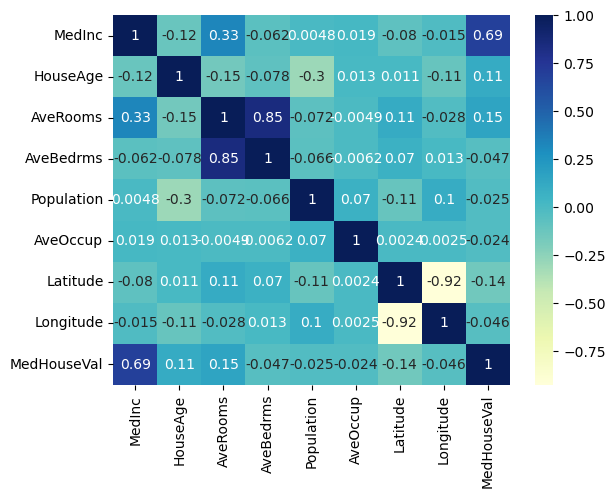

In [55]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [38]:
# Its necessary to convert pandas dataframe into numpy array before train_test_split
x = np.array(df['MedInc'])
x[0:5]

array([8.3252, 8.3014, 7.2574, 5.6431, 3.8462])

In [30]:
y = np.array(df['MedHouseVal'])
y[0:5]

array([4.526, 3.585, 3.521, 3.413, 3.422])

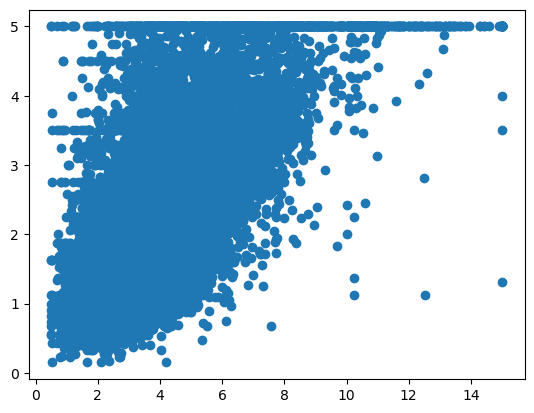

In [31]:
plt.scatter(x,y)
plt.show()

In [10]:
slr = SimpleLinearRegression()

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
slr.fit(x_train,y_train)

In [47]:
y_pred = np.array(slr.predict(x_test))

In [48]:
print(len(y_pred))

4128


In [49]:
print(slr.r2_score(y_test,y_pred))

0.4588591890384667


In [50]:
y_pred.shape

(4128,)

In [51]:
sk_slr = LinearRegression()

In [55]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [56]:
sk_slr.fit(x_train,y_train)

LinearRegression()

In [66]:
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
sk_score = sk_slr.score(x_test,y_test)

In [59]:
print(f'Scikit Learn\'s final R^2 score: {sk_score}')

Scikit Learn's final R^2 score: 0.45885918903846656


<Axes: >

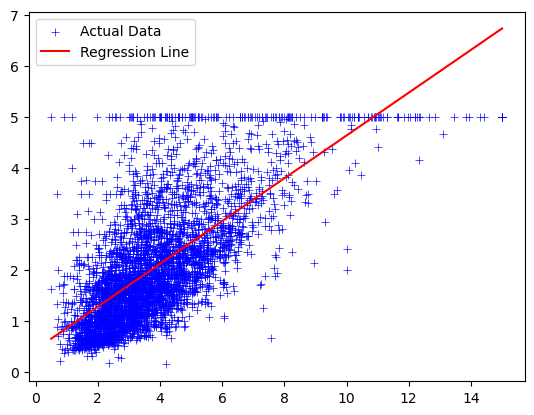

In [63]:
sns.scatterplot(x = x_test, y=y_test, color="blue", marker="+", label = "Actual Data")
sns.lineplot(x = x_test, y=y_pred, color="red", label="Regression Line")